<a href="https://colab.research.google.com/github/tiarapus/Online-Retail-Sales-Performance-Measurement/blob/main/Online_Retail_Sales_Performance_Measurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [ ]:
import pandas as pd

In [ ]:
csv = "/content/online_retail_II (2).csv"
data = pd.read_csv(csv, delimiter=",")

In [ ]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


## Section 1

### Create New Feature: Year

In [ ]:
data['Year'] = pd.DatetimeIndex(data['InvoiceDate']).year

In [ ]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009


In [ ]:
data.shape[0]

1067371

### Filtering Data

In [ ]:
data_filter = data[(data['Quantity'] > 0) & (~data['Invoice'].str.contains('C'))]
data_filter = data_filter.dropna()

In [ ]:
data_filter.shape[0]

805620

In [ ]:
data_filter.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.0


In [ ]:
data_filter.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,14.85
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France,2011,18.00


### Create New Feature: Revenue

In [ ]:
data["Revenue"] = data["Quantity"] * data["Price"]

In [ ]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.0


### Average of Revenue per Year

In [ ]:
average_revenue_per_year = data.groupby('Year')['Revenue'].mean()
average_revenue_per_year

,Revenue
Year,
2009,17.684777
2010,18.152555
2011,18.018195


In [ ]:
revenue_growth_rate = average_revenue_per_year.pct_change() * 100
revenue_growth_rate

,Revenue
Year,
2009,NaN
2010,2.645085
2011,-0.740173


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

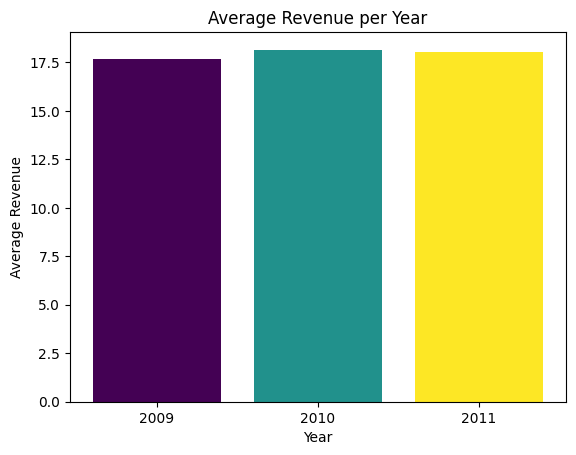

In [ ]:
colors = plt.cm.viridis(np.linspace(0, 1, len(average_revenue_per_year)))


plt.bar(average_revenue_per_year.index, average_revenue_per_year.values, color=colors)
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.title('Average Revenue per Year')
plt.xticks(average_revenue_per_year.index)
plt.show()

### Interpretation


> The average revenue per year showed a modest growth of 2.6% from 2009 to 2010, followed by a decrease of 0.77% from 2010 to 2011.




## Section 2

### Filtering Data

#### Customers who finished their purchases

> Add blockquote



In [ ]:
num_cust_purchace = data_filter.groupby(['Year'])['Customer ID'].nunique()
num_cust_purchace

,Customer ID
Year,
2009,955
2010,4233
2011,4220


#### Customers who canceled their purchases

In [ ]:
num_cust_cancel_purchase = data[data['Invoice'].str.contains('C', na=False)].groupby(['Year'])['Customer ID'].nunique()
num_cust_cancel_purchase


,Customer ID
Year,
2009,309
2010,1730
2011,1494


### Number of Finished and Canceled Transactions Each Year

In [ ]:
num_purchase = data_filter.groupby(['Year'])['Invoice'].nunique()
num_purchase

,Invoice
Year,
2009,1839
2010,21005
2011,19099


In [ ]:
num_cancel_purchase = data[data['Invoice'].str.contains('C', na=False)].groupby(['Year'])['Invoice'].nunique()
num_cancel_purchase


,Invoice
Year,
2009,401
2010,4381
2011,3510


### Cancellation Rate

In [ ]:
cancel_rate = (num_cancel_purchase / num_purchase) * 100
cancel_rate = cancel_rate.apply(lambda x: f"{x:.2f}%")
cancel_rate

,Invoice
Year,
2009,21.81%
2010,20.86%
2011,18.38%


### Interpretation



> The cancellation rate has decreased each year, suggesting fewer cancellations over time, which could be due to improved customer satisfaction or more efficient processes